# BIODIVERSITY IN NATION PARKS

## Introduction

This goal of this project is to analyze biodiversity data from these four National Parks during a one week period.
* Bryce National Park
* Great Smoky Mountains National Park* 
Yellowstone National Par
* 
Yosemite National Pa

This project will analyze data, and seek to find the answers to:
* How many species were observed this week, at these four National Parks?
* What are the convervation status of these species?
* What category of species is most protected?rk

## Data sources
Both observation.csv and species_info.csv was provided by Codecademy.com.
The data for this project is inspired by real data, but is mostly fictional.

In [1]:
from IPython.display import Image
Image(url="yosemite-park.jpg", width=300, height=300) 

In [2]:
# Import Python modules
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import chi2_contingency

from itertools import chain
import string

## Load in data
There are 2 data files to load in.

In [3]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head(20)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


## Scope the data sets

In [5]:
print(f"Species shape: {species.shape}")
print(f"Observations shape: {observations.shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)


There are 5,824 rows of data in the "Species" data set, and 4 columns.

There are 23,296 rows of data in the "Observations" data set, and 3 columns.

In [6]:
print(species.columns)
print(species.dtypes)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [7]:
print(observations.columns)
print(observations.dtypes)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
scientific_name    object
park_name          object
observations        int64
dtype: object


### How many species have been observed in these four National Parks this week?

In [8]:
print("There have been " + str(species.scientific_name.nunique()) + " number of species observed in these four National Parks this week." + '\n')

There have been 5541 number of species observed in these four National Parks this week.



### How many species are there in each of these categories?

In [9]:
print("There are " + str(species.category.nunique()) + " categories of species in this dataset.")

There are 7 categories of species in this dataset.


In [10]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### How many National Parks are there in the dataset, and what are their names?


In [11]:
print("There are " + str(observations.park_name.nunique()) + " National Parks in this dataset.")

There are 4 National Parks in this dataset.


In [12]:
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### There are 4 parks in the data set:
1. Bryce National Park
2. Great Smoky Mountains National Park
3. Yellowstone National Park
4. Yosemite National Park

### What are the conservation statuses of the species?


In [13]:
print("There are " + str(species.conservation_status.nunique()) + " conservation statuses.")
print("These conservation statuses are " + str(species.conservation_status.unique()))

There are 4 conservation statuses.
These conservation statuses are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


#### There are five conservation statuses. Of the five, one of them is empty data ("nan"):

We will assume that the empty data is "Not Endangered." "nan" will have to be converted to "Not Endangered".
When we clean the data later on
* Endangered* 
In Recovery* 
Species of Concer* n
Threaten* ed
nan (empty data)ta)


#### Number of species in each conservation status:

In [14]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

#### The species have some levels of protection, but most of species fall into the "Species of Concern" conservation category. This is the lowest level of conservation.

In [15]:
print(species.conservation_status)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5819    NaN
5820    NaN
5821    NaN
5822    NaN
5823    NaN
Name: conservation_status, Length: 5824, dtype: object


#### The "NaN" shows a lot of missing data in the conservation column. It implies that species are not in danger.

## Clean Data

The first task will be to clean and explore the data in the conservation_status column in species. 

<span style='color: green; font-weight: bold;'>convervation_status</span> has 5 possible values:".

> <span style='font-weight: bold;'>Endangered:</span> seriously at risk of extinction

> <span style='font-weight: bold;'>In Recovery:</span> formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

> <span style='font-weight: bold;'>Species of Concern:</span> declining or appear to be in need of conservation

> <span style='font-weight: bold;'>Threatened:</span> vulnerable to endangerment in the near future

> <span style='font-weight: bold;'>Nan values (missing data )</span> were detected. These values will need to be converted to "Not endangered".

### Change NaN to 'Not Endangered'

In [16]:
species.fillna('Not Endangered', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Not Endangered        5633
Species of Concern     161
Threatened              10
dtype: int64

In [17]:
percent_notEndanger = (5633 * 100) / 5824
print(percent_notEndanger)

96.72046703296704


#### In 5824 species , 5633 are not endangered, it means 96.72% are not endangered.

In [18]:
species_total = species.shape[0]
print("There are " + str(species_total) + " species total.")

There are 5824 species total.


In [19]:
endangered_no = sum(species.conservation_status == 'Not Endangered')
print("Of the " + str(species_total) + " total amount of species, there are " + str(endangered_no) + " species that are not endangered.")

Of the 5824 total amount of species, there are 5633 species that are not endangered.


In [20]:
endangered_yes = species_total - endangered_no
print("There are " + str(endangered_yes) + " species that are endangered, and receive some level of protection.")

There are 191 species that are endangered, and receive some level of protection.


In [21]:
endangered_percent = species_total / endangered_yes * .1
print(str(round(endangered_percent,1)) + "% of the species are endangered.")

3.0% of the species are endangered.


#### Of the 5824 species, only 191 are endangered. This is only 3% of the species.

### Show the number of species and the different categories of protection.

In [22]:
conservationCategory = species[species.conservation_status != "Not Endangered"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory.fillna(0, inplace=True)

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,1.0,0.0,0.0,0.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0.0,4.0,2.0,0.0,0.0,2.0


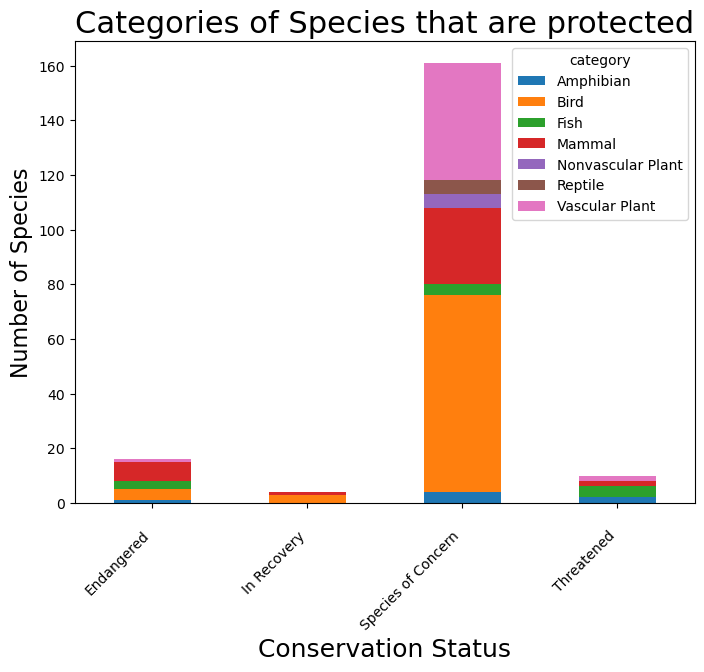

In [24]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status", size=18)
ax.set_ylabel("Number of Species", size=16);
ax.set_title("Categories of Species that are protected", size = 22)
plt.xticks(rotation=45, ha="right")
ax.tick_params(axis='x', which='major', pad=15)

### Unprotected

In [25]:
unprotectedCategory = species[species.conservation_status == "Not Endangered"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

unprotectedCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Not Endangered,73,442,116,176,328,74,4424


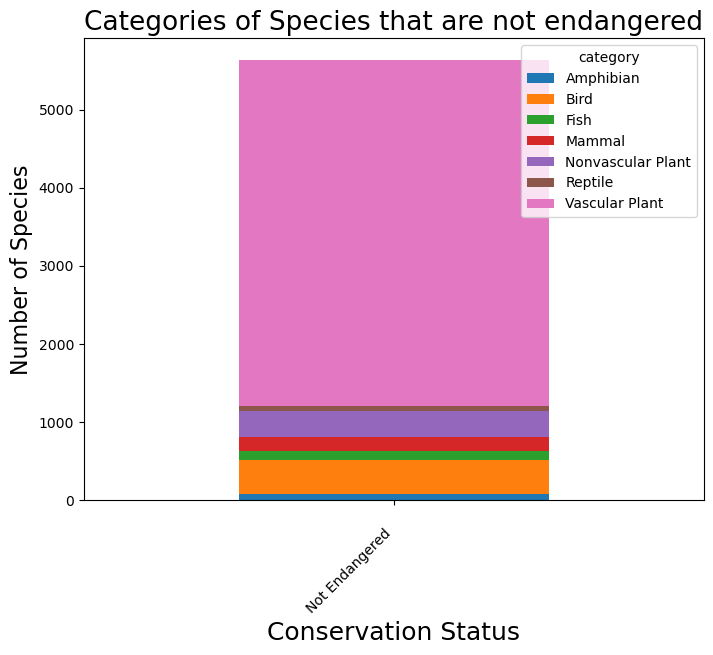

In [26]:
ax = unprotectedCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status", size=18)
ax.set_ylabel("Number of Species", size=16);
ax.set_title("Categories of Species that are not endangered", size = 19)
plt.xticks(rotation=45, ha="right")
ax.tick_params(axis='x', which='major', pad=15)

### Which category of species is most protected?

In [27]:
# Create a new column called 'protected' that holds all species that are protected. 
species['is_protected'] = species.conservation_status != 'Not Endangered'

### Here are the numbers of protected species vs unprotected.

In [28]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [29]:
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Not Endangered,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Not Endangered,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Not Endangered,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Not Endangered,False


### Show percentages (%) of protected species vs unprotected...

In [31]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### The largest percentile of species that are protected are mammals, with a close 2nd being birds. Mammals represent 17% of the protected species. Birds represent 15% of the protected species. Plants, represent only 2.5% of the protected species.